<a href="https://colab.research.google.com/github/akriti-thakur/assesment/blob/main/accredian_assig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import time
start=time.time()
df=pd.read_csv("/content/Fraud.csv")
print("Time taken to load this file is :",time.time()-start)

Time taken to load this file is : 18.43314814567566


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


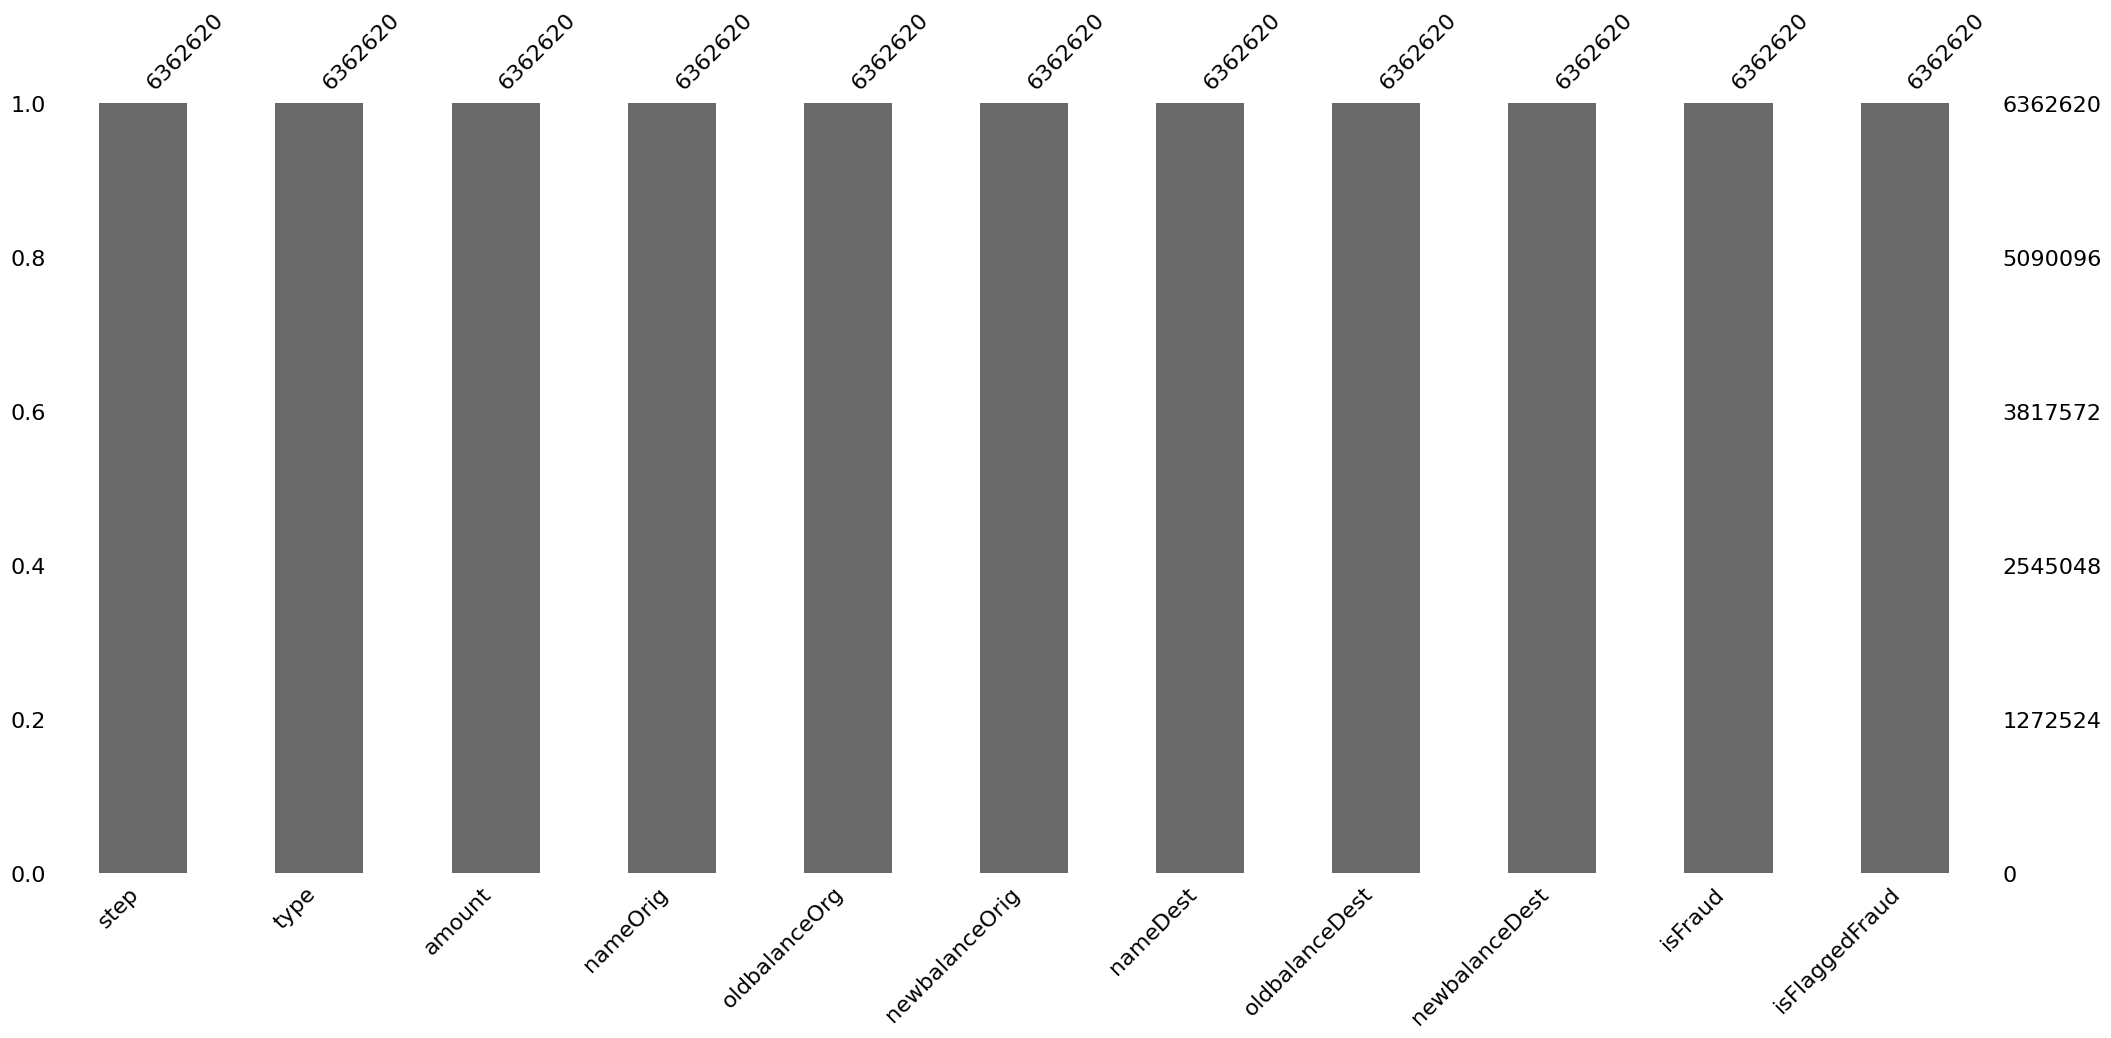

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df)
plt.show()

as we can see their is no missing value

# descriptive statistics

In [8]:
filter=df['isFraud']==0
notfraud=df[filter]
notfraud.head(10)
notfraud.info()
# here we have use filter to filter out the rows

<class 'pandas.core.frame.DataFrame'>
Index: 6354407 entries, 0 to 6362323
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 581.8+ MB


above we have  list out the rows that are counted as fraud and below  we will list out the rows that are counted as not fraud

In [9]:
fraud=df[~filter]
fraud.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


In [10]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8213 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8213 non-null   int64  
 1   type            8213 non-null   object 
 2   amount          8213 non-null   float64
 3   nameOrig        8213 non-null   object 
 4   oldbalanceOrg   8213 non-null   float64
 5   newbalanceOrig  8213 non-null   float64
 6   nameDest        8213 non-null   object 
 7   oldbalanceDest  8213 non-null   float64
 8   newbalanceDest  8213 non-null   float64
 9   isFraud         8213 non-null   int64  
 10  isFlaggedFraud  8213 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 770.0+ KB


here we will find those rows where isFlaggedFraud is 0 and 1

In [11]:
filter1=df['isFlaggedFraud']==0
noflagfraud=df[filter]
noflagfraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6354407 entries, 0 to 6362323
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 581.8+ MB


In [12]:
flagfraud=df[~filter1]
flagfraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2736446 to 6362584
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16 non-null     int64  
 1   type            16 non-null     object 
 2   amount          16 non-null     float64
 3   nameOrig        16 non-null     object 
 4   oldbalanceOrg   16 non-null     float64
 5   newbalanceOrig  16 non-null     float64
 6   nameDest        16 non-null     object 
 7   oldbalanceDest  16 non-null     float64
 8   newbalanceDest  16 non-null     float64
 9   isFraud         16 non-null     int64  
 10  isFlaggedFraud  16 non-null     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ KB


In [13]:
print("the number of rows labled as isFraud are",len(fraud))
print("the number of rows not labled as isFraud are",len(notfraud))
print("the number of rows labled as isFlaggedFraud are",len(flagfraud))
print("the number of rows are not labled as isFlaggedFraud are",len(noflagfraud))


the number of rows labled as isFraud are 8213
the number of rows not labled as isFraud are 6354407
the number of rows labled as isFlaggedFraud are 16
the number of rows are not labled as isFlaggedFraud are 6354407


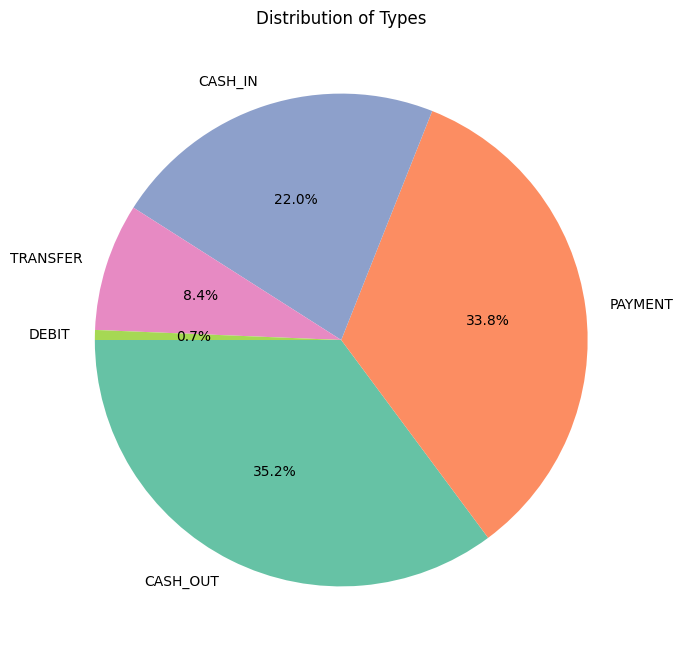

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
color=sns.color_palette("Set2",len(df['type'].unique()))
counts=df["type"].value_counts()
counts.plot.pie(autopct="%1.1f%%",colors=color,startangle=180)

plt.title('Distribution of Types')
plt.ylabel('')
plt.show()





from here we came to know that the madf. number of type of tranaction is cash_out and payment

# which kind of transaction are fraud

There are 2 flags From those,isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some condition being triggered.

In [15]:
fraud_type=fraud['type'].unique()

fraud_transfer = fraud[fraud['type'] == 'TRANSFER']
fraud_cashout = fraud[fraud['type'] == 'CASH_OUT']


print("type of transaction which are fraud: {}".format(fraud_type))
print('Number of transfers that are fraud: {}'.format(len(fraud_transfer)))
print('Number of cashouts that are fraud: {}'.format(len(fraud_cashout)))

type of transaction which are fraud: ['TRANSFER' 'CASH_OUT']
Number of transfers that are fraud: 4097
Number of cashouts that are fraud: 4116


#### now we will analyse the isflaggedfraud column

In [16]:
print("min amount which is flagged as 1 :",flagfraud['amount'].min())
print("max amount which is flagged as 0  :",noflagfraud['amount'].max())

min amount which is flagged as 1 : 353874.22
max amount which is flagged as 0  : 92445516.64


- ##### according to the assesment, this model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
- ##### This variable is useless because madfimum amount transfer in single transcation is 92445516.64 , `There are only 16 values where isFlaggedFraud is set so we will drop this feature.`

####  Oldblanceorig and newbalanceorig columns

In [17]:
filter2 = (df['amount'] != 0) & (df['newbalanceOrig'] == 0) & (df['oldbalanceOrg'] == 0)
new1=df[filter2]
new1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,0.0,0.0,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,0.0,0.0,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,0.0,0.0,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,0.0,0.0,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,0.0,0.0,0,0


- as we can see that the transaction amount is their but oldbalanceorg and newbalanceorg are zero.`This indicates that their are missing value in our dataset`

In [18]:
new2 = new1[(new1['nameDest'].str.startswith('M')) & (new1['isFraud'] == 1)]
new2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            0 non-null      int64  
 1   type            0 non-null      object 
 2   amount          0 non-null      float64
 3   nameOrig        0 non-null      object 
 4   oldbalanceOrg   0 non-null      float64
 5   newbalanceOrig  0 non-null      float64
 6   nameDest        0 non-null      object 
 7   oldbalanceDest  0 non-null      float64
 8   newbalanceDest  0 non-null      float64
 9   isFraud         0 non-null      int64  
 10  isFlaggedFraud  0 non-null      int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 0.0+ bytes


`There are no Merchant account is flagged as fraud ,so missing information does not affect while building model`

# task 1

handeling missing values

In [3]:

df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = -1
df.loc[(df.oldbalanceOrg == 0) & (df.newbalanceOrig == 0) & (df.amount != 0), ['oldbalanceOrg', 'newbalanceOrig']] = 0


 here we are preparing the dataset to handle edge cases and potential anomalies

## finding  outliers and related columns

In [20]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plot of Data Columns")
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-1a48a6b8f606>", line 7, in <cell line: 7>
    sns.boxplot(data=df)
  File "/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py", line 1597, in boxplot
    p = _CategoricalPlotter(
  File "/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py", line 67, in __init__
    super().__init__(data=data, variables=variables)
  File "/usr/local/lib/python3.10/dist-packages/seaborn/_base.py", line 634, in __init__
    self.assign_variables(data, variables)
  File "/usr/local/lib/python3.10/dist-packages/seaborn/_base.py", line 673, in assign_variables
    frame, names = self._assign_variables_wideform(data, **variables)
  File "/usr/local/lib/python3.10/dist-packages/seaborn/_base.py", line 795, in _assign_variables_wideform
    numeric_cols = [
  File "/usr/l

TypeError: object of type 'NoneType' has no len()

<Figure size 1500x1000 with 0 Axes>

oldbalanceDest and newbalanceDest have a much wider range and higher values, indicating significant variability in the balances of destination accounts.raudulent transactions and flagged frauds are rare in the dataset.outliers are significant in variables like amount, oldbalanceOrg, and newbalanceOrig.

In [4]:
import numpy as np
def cap_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
   lower_bound = df[column].quantile(lower_quantile)
   upper_bound = df[column].quantile(upper_quantile)
   df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
   df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

df_capped = cap_outliers(df, 'amount')
df_capped = cap_outliers(df, 'oldbalanceDest')
df_capped = cap_outliers(df, 'newbalanceDest')


capping outliers:Useful when you want to keep all data but limit the influence of edftreme values.

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.6400,757869,170136.0,160296.36,1662094,-1.0,-1.0,0,0
1,1,3,1864.2800,2188998,21249.0,19384.72,1733924,-1.0,-1.0,0,0
2,1,4,449.4676,1002156,181.0,0.00,439685,-1.0,-1.0,1,0
3,1,1,449.4676,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.1400,3445981,41554.0,29885.86,828919,-1.0,-1.0,0,0


In [7]:
df['errorbalanceorig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorbalancedest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

#  this is useful for detecting anomalies and ensuring data integrity.

In [8]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceorig,errorbalancedest
0,1,3,9839.6400,757869,170136.0,160296.36,1662094,-1.0,-1.0,0,0,0.0000,9839.6400
1,1,3,1864.2800,2188998,21249.0,19384.72,1733924,-1.0,-1.0,0,0,0.0000,1864.2800
2,1,4,449.4676,1002156,181.0,0.00,439685,-1.0,-1.0,1,0,268.4676,449.4676
3,1,1,449.4676,5828262,181.0,0.00,391696,21182.0,0.0,1,0,268.4676,21631.4676
4,1,3,11668.1400,3445981,41554.0,29885.86,828919,-1.0,-1.0,0,0,0.0000,11668.1400


# task 3

##### Statistical Test

In [9]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df['isFraud'], df['oldbalanceOrg'])
print(f'Point-Biserial Correlation: {corr}, p-value: {p_value}')


Point-Biserial Correlation: 0.010154421850335386, p-value: 1.0542893551537907e-144


The correlation coefficient of 0.010154421850335386 indicates a very weak positive relationship between the two variables. this is suitable for evaluating the relationship between a binary variable and continuous variables.

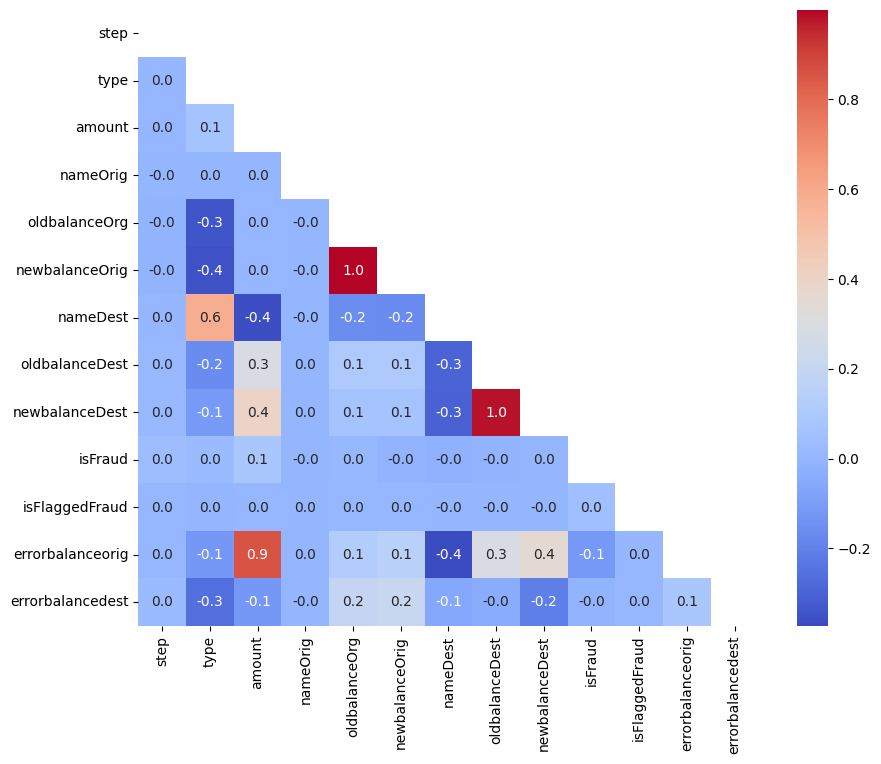

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(), mask = mask ,annot=True, fmt='.1f', cmap="coolwarm")
plt.show()


In [11]:
import numpy as np


corr_matridf = df.corr().abs()

mask = np.triu(np.ones_like(corr_matridf, dtype = bool))
tri_df = corr_matridf.mask(mask)

to_drop = [df for df in tri_df.columns if any(tri_df[df] >0.98)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 11 columns.


 here we have removed highly correlated columns to avoid multicollinearity, which can make the model less interpretable and potentially degrade its performance.

In [12]:
df= df.drop(columns=['isFlaggedFraud','nameDest','nameOrig'],axis = 1)

as we have already seen above that isflagged fraud is not and important factor and will not play any important role in  oue model

In [13]:
df.head(20)

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,errorbalanceorig,errorbalancedest
0,1,3,9839.6400,160296.36,-1.00,0,0.0000,9839.6400
1,1,3,1864.2800,19384.72,-1.00,0,0.0000,1864.2800
2,1,4,449.4676,0.00,-1.00,1,268.4676,449.4676
3,1,1,449.4676,0.00,0.00,1,268.4676,21631.4676
4,1,3,11668.1400,29885.86,-1.00,0,0.0000,11668.1400
5,1,3,7817.7100,46042.29,-1.00,0,0.0000,7817.7100
6,1,3,7107.7700,176087.23,-1.00,0,0.0000,7107.7700
7,1,3,7861.6400,168225.59,-1.00,0,0.0000,7861.6400
8,1,3,4024.3600,0.00,-1.00,0,1353.3600,4024.3600
9,1,2,5337.7700,36382.23,40348.79,0,0.0000,6886.9800


# ML model


In [ ]:
from sklearn.model_selection import train_test_split


In [99]:
x = df.loc[(df['type'] == 1) | (df['type'] == 2)]
y = x['isFraud']
x = x.drop(['isFraud'],axis = 1)


# print(x)
print(y)

3          1
9          0
10         0
15         0
21         0
          ..
6362611    1
6362613    1
6362615    1
6362617    1
6362619    1
Name: isFraud, Length: 2278932, dtype: int64


In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27,shuffle=True)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Gradient Boosting Classifier

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [139]:
y_pred = gbc.predict(X_test_scaled)

In [141]:
def plot_confusion_matrix(y,y_predict):


    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    # ax.xaxis.set_ticklabels(['non-cancerous', 'cancer']); ax.yaxis.set_ticklabels(['non-cancerous', 'cancer'])
    plt.show()

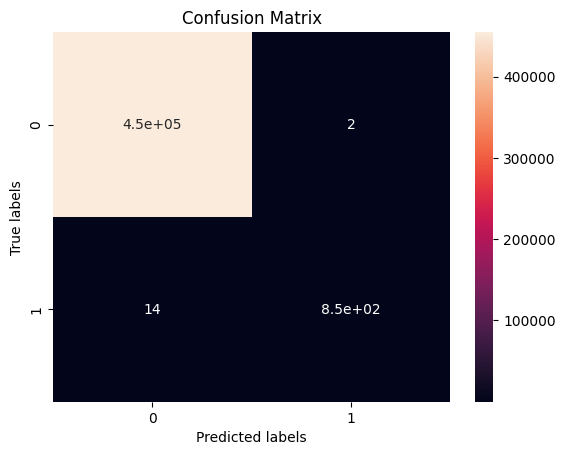

In [143]:
plot_confusion_matrix(y_test,y_pred)

- The model has a high accuracy, indicating it correctly classifies the majority of transactions.
- Only 2 non-fraudulent transactions were incorrectly flagged as fraudulent.
- 14 fraudulent transactions were missed, which needs to be minimized for better fraud detection.

In [140]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print('The accuracy score is', accuracy)
print('The confusion matrix is\n', confusion)
print('The classification report is\n', clf_report)

The accuracy score is 0.9999648958833841
The confusion matrix is
 [[454923      2]
 [    14    848]]
The classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    454925
           1       1.00      0.98      0.99       862

    accuracy                           1.00    455787
   macro avg       1.00      0.99      1.00    455787
weighted avg       1.00      1.00      1.00    455787



` This report indicates that your model is performing extremely well in identifying both non-fraudulent and fraudulent transactions with very high accuracy, precision, and recall.`

 my choice for Gradient Boosting Classifier was based on its ability to deliver high performance, handle imbalanced datasets, and provide useful feature importance insights.

task 5

In [ ]:
import shap


explainer = shap.Explainer(gbc, X_train_scaled)
shap_values = explainer.shap_values(X_train_scaled)
shap.summary_plot(shap_values, X_train_scaled)


 45%|=========           | 825433/1823145 [13:59<16:54]       

The most important features in your model for predicting fraudulent transactions may be determined by utilizing feature significance and SHAP values. You may use these insights to better understand your model's behavior and possibly enhance it by concentrating on its most important aspects.

#  task 4 -testing

In [ ]:
import joblib
joblib.dump(grid_search, 'logistic_regression_model.joblib')

In [ ]:
import joblib
ob=joblib.load('logistic_regression_model.joblib')
y_pre=ob.predict(X_test)
y_pre

In [ ]:
# y_pre.compute()

- task 2:
` my fraud detection model follows a systematic approach to preprocessing, model selection, and evaluation. The use of Dask helps efficiently handle large datasets, making the process scalable and robust. With  the initial accuracy of 99.9% , the exploration of different models and hyperparameters is a solid strategy for achieving better performance.`

- task 7:
1. focus more on payment method  like 'Transfer' & 'Cash_out'
2. focus more on isFlaggedFraud as this is not functioning properly
3. provide end-to-end encryption
4. educate the user about the frauds